In [60]:
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [44]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [45]:
df.shape

(301, 9)

In [46]:
print(df.Seller_Type.unique(),df.Year.unique())

['Dealer' 'Individual'] [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [47]:
## Null values

df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [48]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [49]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [50]:
df2=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df2['Current_Year']=2020
df2['Year']= df2['Current_Year'] - df2['Year']
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [53]:
df2.drop('Current_Year',axis=1,inplace=True)

In [54]:
df2.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
#Convert categorical feature to Dummy values

df2=pd.get_dummies(df2, drop_first= True)
df2.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


In [57]:
df2.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,-0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


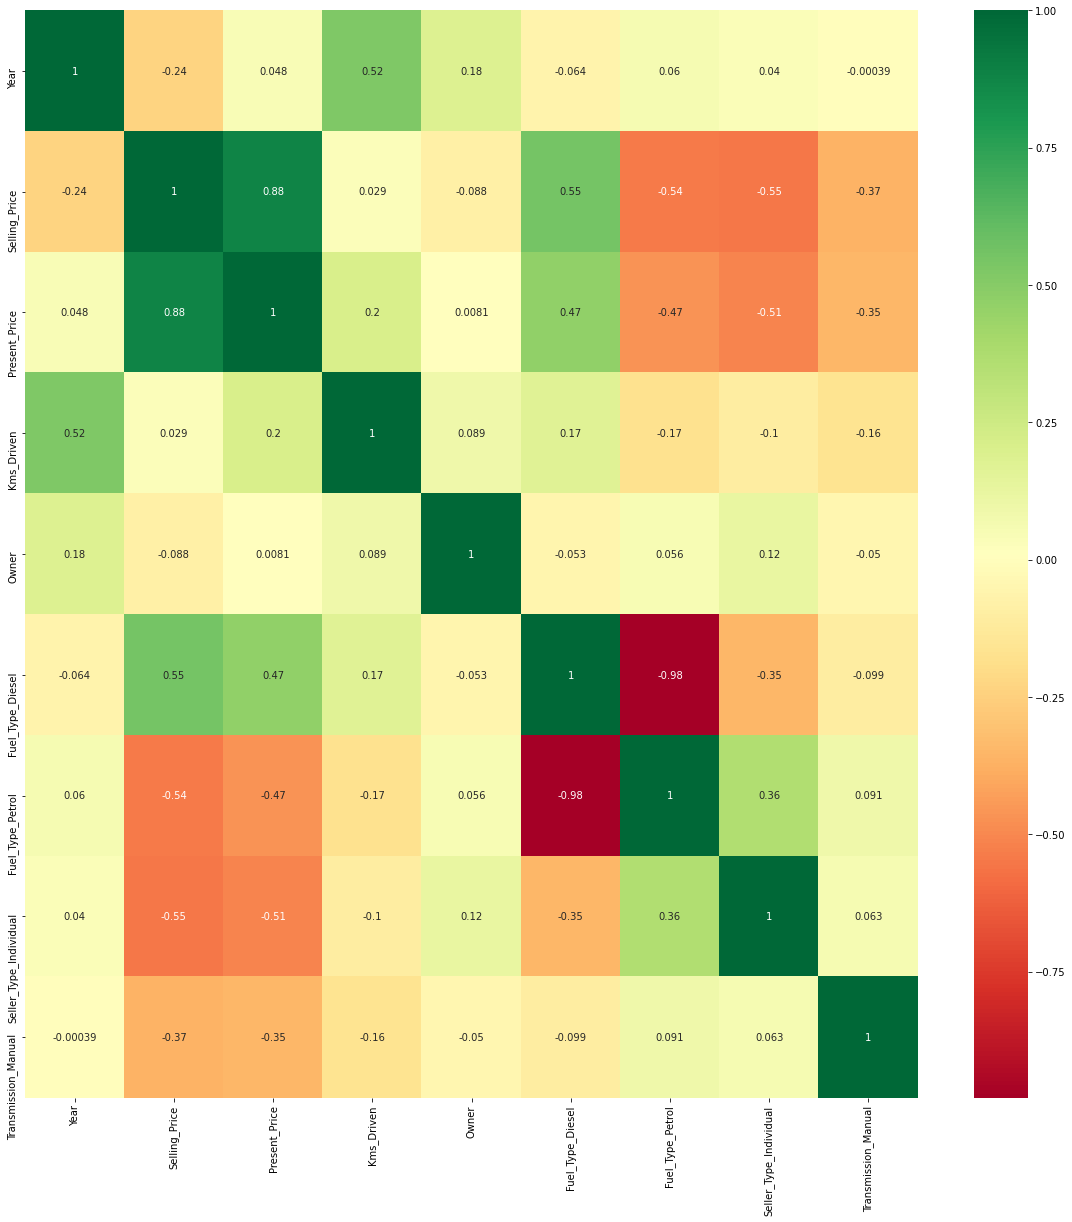

In [64]:
# heat map for correlation

corrmat=df2.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 

#plot heat map 
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [68]:
df2['Total_Year']= df2['Year']

In [70]:
df2.drop('Year', axis=1, inplace = True)

In [71]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Total_Year
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,1,0,1,3
3,2.85,4.15,5200,0,0,1,0,1,9
4,4.60,6.87,42450,0,1,0,0,1,6


In [72]:
X= df2.iloc[:,1:]
y= df2.iloc[:,0]

In [74]:
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Total_Year
0,5.59,27000,0,0,1,0,1,6
1,9.54,43000,0,1,0,0,1,7
2,9.85,6900,0,0,1,0,1,3
3,4.15,5200,0,0,1,0,1,9
4,6.87,42450,0,1,0,0,1,6


In [75]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [77]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=11105e6b1b3a7ec3711df4519250839ae8135b9af89e18e313282a7b28378cb4
  Stored in directory: c:\users\anshu\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [95]:
## Feature Importance

from sklearn.ensemble import ExtraTreesRegressor

model= ExtraTreesRegressor()

model.fit(X,y)

ExtraTreesRegressor()

In [96]:
model.feature_importances_

#     gives feature importance to select only 
#     top features here(we wont do it here though)


array([3.72702086e-01, 4.36902888e-02, 3.05401689e-04, 2.31340764e-01,
       1.60097523e-02, 1.21365007e-01, 1.39065014e-01, 7.55216865e-02])

In [97]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2)

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [99]:
## Hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [100]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [101]:
# Creating Base model
rf = RandomForestRegressor()

In [105]:
# Passing through random search to pick up best parameters
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              scoring='neg_mean_squared_error',n_iter=10,
                              cv = 5, verbose = 2, random_state=42, n_jobs=1)

In [116]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [117]:
prediction= rf_random.predict(X_test)

In [118]:
print(prediction)

[ 6.211955  0.63641   0.61451   2.91963   5.03493   2.17597   2.74505
  0.69717   0.92587   6.27964   0.97892   0.42622   3.20028   2.72108
 12.16281   6.1962    1.44895   0.89834   9.093805  2.92454  12.50548
  1.09739   2.93812   5.54596   0.46707   4.40915   0.48335   3.60444
  0.50782  20.22062  20.22062   2.72945   0.42575   6.324685  2.6801
  7.839925  0.58234   5.53288   0.37899   5.56559   4.21035   0.3475
  0.61347   3.41393   6.20831   4.90758   1.1       4.1766    2.24974
  3.01855   1.09387   4.77859   0.56578   3.93347   0.88521  11.956335
  6.82887   3.45609   9.40891   1.21648   9.17642 ]


In [119]:
rf_random.score(X_test, Y_test)

-9.156406154047964

c:\users\anshu\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

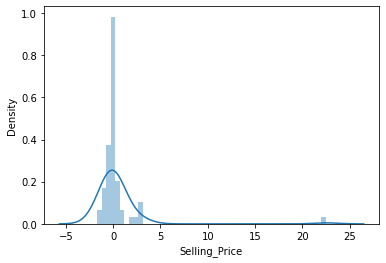

In [120]:
sns.distplot(Y_test-prediction)

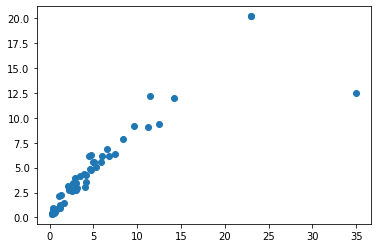

In [121]:
plt.scatter(Y_test,prediction)